# Homework 8 - Renormalization Group #

# Consegna #

Consider the quantum Ising Hamiltonian in transverse field on a one-dimensional lattice with the nearest neighbour interaction:
$$
\hat{H} = \lambda {\sum_i}^N {\sigma_i}^z + {\sum_i}^{N-1} {\sigma_i}^x {\sigma_{i+1}}^x 
$$

where $\sigma^x$ and $\sigma^z$ and $\lambda$ is the transverse field. 

(a) Compute the ground state energy as a function of the transverse field 𝜆 by means of the real-space
RG algorithm.

(b) $\textit{Optional}$: Compute the ground state energy as a function of 𝜆 by means of the INFINITE DMRG
algorithm. Compare the results between them and with the mean field solution.


**Teoria a pag. pdf 49 del libro di Montangero**

Real-space renormalization group method is an approximation method based on a very powerful physical intuition: the hypothesis that the ground state of a system is composed of low-energy states of the system’s (non-interacting) bipartitions. Based on this assumption, it is indeed possible to introduce an algorithm that allows describing the ground state properties of many-body quantum systems with large sizes $( N )$, up to the thermodynamical limit corresponding to the fixed point of the renormalization flow.

The algorithm proceeds as follows:

1. **Initialize**:  
   Consider a system composed of $( N )$ sites that can be studied in an exact numerical way. Build the Hamiltonian $( H_N : \mathbb{C}^{dN} \to \mathbb{C}^{dN} )$.

2. **Diagonalize the Hamiltonian**:  
   Diagonalize $( H_N )$, finding its eigenvalues and eigenvectors:
   $$
   H_N = \sum_{i=1}^{d^N} E_i \lvert E_i \rangle \langle E_i \rvert,
   $$
   where the eigenvalues $( E_i )$ are in increasing order.  
   Consider the projector onto the lowest $( m )$ eigenstates:
   $$
   P = \sum_{i=1}^m \lvert E_i \rangle \langle E_i \rvert,
   $$
   which projects the Hilbert space onto the subspace spanned by the first $( m )$ low-energy eigenstates.  
   Compute the projected Hamiltonian:
   $$
   \tilde{H}_N = P^\dagger H_N P,
   $$
   as well as any other needed operator representation in the projected space:
   $$
   \tilde{O} = P^\dagger O P.
   $$

3. **Construct the larger system Hamiltonian**:  
   Construct the Hamiltonian of a system of size $( 2N )$ using the projected Hamiltonian $( \tilde{H}_N )$ for each bipartition and the interaction among them:
   $$
   H_{2N} = \tilde{H}_N \otimes 1 + 1 \otimes \tilde{H}_N + \tilde{H}_{\text{int}}.
   $$
   The interaction Hamiltonian can be obtained as:
   $$
   \tilde{H}_{\text{int}} = \tilde{A}_N \otimes \tilde{B}_N,
   $$
   where $( \tilde{A} )$ ($( \tilde{B} )$) are the projected operators acting on each system bipartition:
   $$
   \tilde{A} = P^\dagger A P, \quad \tilde{B} = P^\dagger B P.
   $$

4. **Repeat until convergence**:  
   Repeat steps 2–3 until the desired system size is reached or convergence to the renormalization group fixed point is achieved.  
   At each step of the algorithm, the dimension of the described system is doubled ($( N \to 2N )$) while the dimension of the Hamiltonian representation is kept constant at $( m )$.



**metti a posto le formule in latex**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import aux
import ising as ig
import scipy.sparse as sp
import rg 
import density_matrix_functions as dm
import infinite_dmrg as dmrg

In [ ]:
tau = 1e-14
max_iter = 60
plt.figure(figsize=(8, 6))

N_vals = [2,3,4]
l_vals = np.linspace(0,3,30)
n_iter = np.zeros((len(N_vals),l_vals.shape[0]))
final_dims = np.zeros((len(N_vals),l_vals.shape[0]))
energies =  np.zeros((len(N_vals),l_vals.shape[0], max_iter))
deltas_tot =  np.zeros((len(N_vals),l_vals.shape[0],max_iter))
final_energy = np.zeros((len(N_vals),l_vals.shape[0]))
final_deltas = np.zeros((len(N_vals),l_vals.shape[0]))
for i,N in enumerate(N_vals):
    print(f'########## Computing for N = {N} ############')
    for j,lam in enumerate(l_vals):
        
        energy_densities, deltas, it, final_dim = rg.real_space_rg(N=N, m=2**N, tau=tau,lam=lam, max_iterations=max_iter)
        
        energies[i,j,:] = energy_densities
        final_energy[i,j] = [x for x in energy_densities if x != 0][-1]
        deltas_tot[i,j,:] = deltas
        final_deltas[i,j] = [x for x in deltas if x != 0][-1]
        n_iter[i,j] = it
        final_dims[i,j] = final_dim
    
    plt.plot(l_vals, n_iter[i,:], label=f'RG (N={N})', marker='o', linestyle='-')

plt.axvline(x=1.0, c='r', label='λ critical', linestyle='--')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.title('Iterations for convergence vs λ for various N')
plt.xlabel('Trasverse Field (λ)')
plt.ylabel('Number of iterations to reach convergence')
plt.savefig('Figures/lam_it.png')
plt.show()

# Plot of final dimension vs lambda
plt.figure(figsize=(8, 6))
for i,N in enumerate(N_vals):
    plt.plot(l_vals, final_dims[i,:], label=f'RG (N={N})', marker='o', linestyle='-')
plt.axvline(x=1.0, c='r', label='λ critical', linestyle='--')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.title('Final dimension vs λ for various N')
plt.xlabel('Trasverse Field (λ)')
plt.ylabel('System Dimension (N)')
plt.yscale('log')
plt.savefig('Figures/final_dim.png')
plt.show()

# Plot the final energy densities
plt.figure(figsize=(8, 6))
for i,N in enumerate(N_vals):
    plt.plot(l_vals, final_energy[i,:], label=f'RG (N={N})', marker='o', linestyle='-')
plt.axvline(x=1.0, c='r', label='λ critical', linestyle='--')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.title('Final energy density vs λ for various N')
plt.xlabel('Trasverse Field (λ)')
plt.ylabel('Energy desnity')
plt.savefig('Figures/final_energy.png')
plt.show()
    

## Infinite Density Matrix RG ##

In [3]:
# Parameters
N = 2
l_values = np.linspace(0, 4, 30)
tau = 1e-5
max_iter = 100

final_dims = []

for j,lam in enumerate(l_values):
    
    energy_densities, deltas, it, final_dim = rg.real_space_rg(N=N, m=2**N, tau=tau,lam=lam, max_iterations=max_iter)
    
    final_dims.append(final_dim)

Starting iteration 10 ...
Convergence reached at N = 131072 with precision delta 7.82130097776168e-06 after 16 iterations.
Starting iteration 10 ...
Convergence reached at N = 131072 with precision delta 7.484175602812115e-06 after 16 iterations.
Starting iteration 10 ...
Convergence reached at N = 131072 with precision delta 6.73033703502135e-06 after 16 iterations.
Starting iteration 10 ...
Convergence reached at N = 131072 with precision delta 6.306546132872626e-06 after 16 iterations.
Starting iteration 10 ...
Convergence reached at N = 131072 with precision delta 5.2428267944826246e-06 after 16 iterations.
Starting iteration 10 ...
Convergence reached at N = 65536 with precision delta 7.606203590748706e-06 after 15 iterations.
Starting iteration 10 ...
Convergence reached at N = 32768 with precision delta 7.748849910171884e-06 after 14 iterations.
Convergence reached at N = 512 with precision delta 3.4428934814201284e-08 after 8 iterations.
Convergence reached at N = 128 with prec

In [2]:
# Parameters
m_init = 2
m_max = 1
tau = 1e-5
max_iter = 100

_, _, _, dims2 = dmrg.update_hamiltonian(l_values, m_init, m_max, tau, max_iter)

Computing for N=204...
Reached N = 204 with precision: delta = 4.853426519046966e-05
Reached N = 204 with precision: delta = 4.8069826080410216e-05
Reached N = 204 with precision: delta = 4.6759927948114566e-05
Reached N = 204 with precision: delta = 4.499691683523821e-05
Reached N = 204 with precision: delta = 4.444926865443399e-05
Reached N = 204 with precision: delta = 5.392612940458008e-05
Reached N = 204 with precision: delta = 0.00011344792436851492
Reached N = 204 with precision: delta = 1.6568976528574808e-05
Reached N = 204 with precision: delta = 1.3328762309194886e-05
Reached N = 204 with precision: delta = 1.1282587060623683e-05
Convergence reached after 100 iterations.
Reached N = 204 with precision: delta = 9.839174716308463e-06
Convergence reached after 94 iterations.
Reached N = 192 with precision: delta = 9.886245886603362e-06
Convergence reached after 89 iterations.
Reached N = 182 with precision: delta = 9.933288446228872e-06
Convergence reached after 85 iterations.


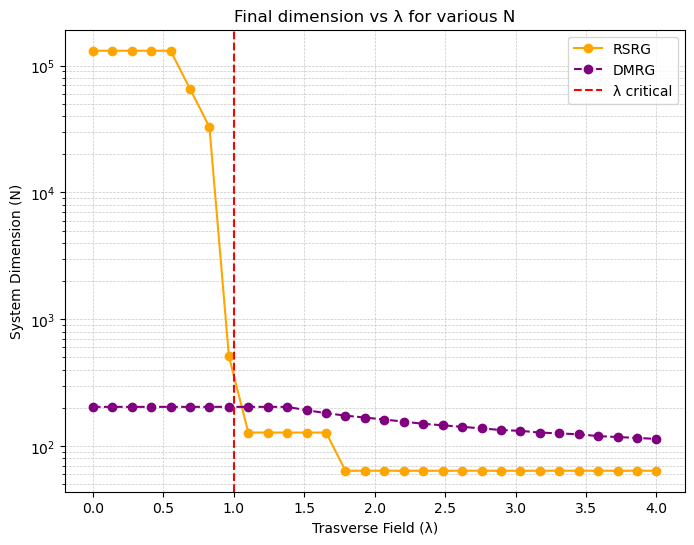

In [6]:
plt.figure(figsize=(8, 6))  # Set the figure size

plt.plot(l_values, final_dims, label='RSRG', marker='o', linestyle='-', color='orange')
plt.plot(l_values, list(dims2.values()), label='DMRG', marker='o', linestyle='--', color='purple')
plt.axvline(x=1.0, c='r', label='λ critical', linestyle='--')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.title('Final dimension vs λ for various N')
plt.xlabel('Trasverse Field (λ)')
plt.ylabel('System Dimension (N)')
plt.yscale('log')
plt.savefig('Figures/final_dim_vs.png')
plt.show()